<a href="https://colab.research.google.com/github/brayanb1701/Fisica-III---Lab-6/blob/main/Lab_fisica_III_RLC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import os
from scipy.optimize import curve_fit,fsolve, fmin, minimize_scalar
from sklearn.metrics import r2_score, mean_squared_error
from scipy.interpolate import interp1d

In [2]:
R=[100, 200, 50]
C=[3, 1, 6]
L=[3, 1, 6]

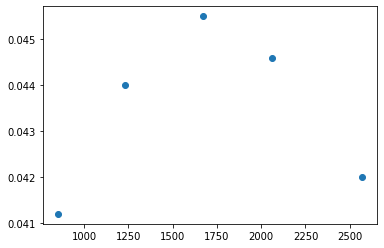

In [10]:
sheet = str(R[0])+'R-'+str(C[0])+'C-'+str(L[0])+'L'
data = pd.read_excel("Datos_Lab_RLC.xlsx", sheet)
plt.scatter(data['f'],data['Iexp'])

In [4]:
def Irms(f, V,w0):
    w=2*np.pi*f
    return (V*w)/np.sqrt(100**2*w**2+(3e-3)**2*(w**2-w0**2)**2)

coef1, pcov1 = curve_fit(Irms, data['f'], data['Iexp'], p0=[4.555,3348*np.pi])
R_S1 = r2_score( data['Iexp'],Irms(data['f'], *coef1))
RMSE1 = mean_squared_error( data['Iexp'],Irms(data['f'], *coef1), squared=False)
print("R^2 y RMSE para 1: "+str(R_S1)+" "+str(RMSE1))
print("C="+str(coef1))

R^2 y RMSE para 1: 0.8754790741471948 0.0005688191045806466
C=[4.47383433e+00 1.01431568e+04]


In [5]:
1/(np.sqrt(3e-3*3e-6))

10540.925533894597

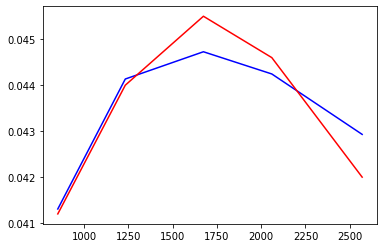

In [67]:
plt.plot(data['f'], Irms(data['f'], *coef1), c='b')
plt.plot(data['f'],data['Iexp'],c='r')

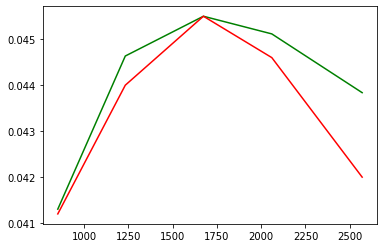

In [68]:
plt.plot(data['f'], Irms(data['f'], 4.55,1/(np.sqrt(3e-3*3e-6))), c='g')
plt.plot(data['f'],data['Iexp'],c='r')

Text(0, 0.5, '$Voltaje$ $[V]$')

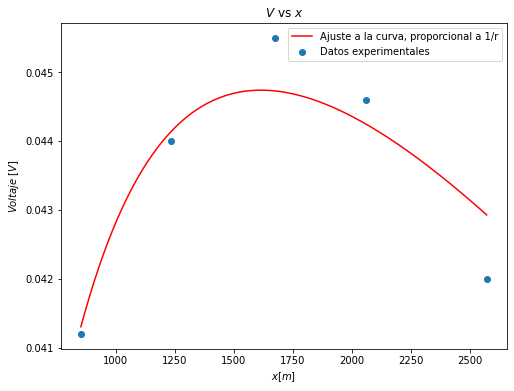

In [60]:
plt.figure(figsize=[8,6])
f2 = np.linspace(min(data['f']),max(data['f']),1000)
plt.scatter(data['f'], data['Iexp'], label='Datos experimentales')
plt.plot(f2,Irms(f2, *coef1), c='red', label='Ajuste a la curva, proporcional a 1/r')
plt.legend()
plt.title('$V$ vs $x$')
plt.xlabel('$x [m]$')
plt.ylabel('$Voltaje$ $[V]$')

Text(0, 0.5, '$Voltaje$ $[V]$')

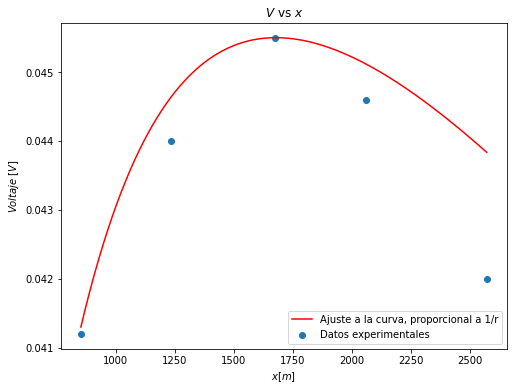

In [62]:
plt.figure(figsize=[8,6])
f2 = np.linspace(min(data['f']),max(data['f']),1000)
plt.scatter(data['f'], data['Iexp'], label='Datos experimentales')
plt.plot(f2,Irms(f2, 4.55,1/(np.sqrt(3e-3*3e-6))), c='red', label='Ajuste a la curva, proporcional a 1/r')
plt.legend()
plt.title('$V$ vs $x$')
plt.xlabel('$x [m]$')
plt.ylabel('$Voltaje$ $[V]$')

In [12]:
f_int1=interp1d(data['f'],data['Iexp'], kind='quadratic')
max = minimize_scalar(lambda x: -f_int1(x),bounds=(1000, 2000), method='bounded')
print(max)

     fun: -0.045501947964634554
 message: 'Solution found.'
    nfev: 7
  status: 0
 success: True
       x: 1689.5138668914474


<Figure size 864x576 with 0 Axes>

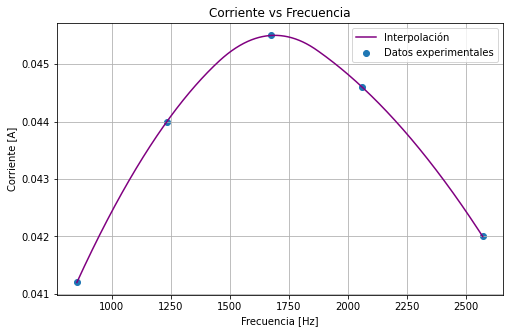

In [20]:
plt.figure(figsize=(12,8))
f2 = np.linspace(np.min(data['f']),np.max(data['f']),1000)
plt.figure(figsize=[8,5])
plt.scatter(data['f'],data['Iexp'],label='Datos experimentales')
plt.plot(f2,f_int1(f2), c='purple',label='Interpolación')
plt.title('Corriente vs Frecuencia')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Corriente [A]')
plt.legend()
plt.grid()

In [3]:
R=[100, 200, 50]
C=[3, 1, 6]
L=[3, 1, 6]
colors=['red', 'green', 'blue']

     fun: -0.04550194796463455
 message: 'Solution found.'
    nfev: 10
  status: 0
 success: True
       x: 1689.513895284189
     fun: -0.023993744440278734
 message: 'Solution found.'
    nfev: 8
  status: 0
 success: True
       x: 1489.047746783318
     fun: -0.08854456719790228
 message: 'Solution found.'
    nfev: 9
  status: 0
 success: True
       x: 1636.4973876378606


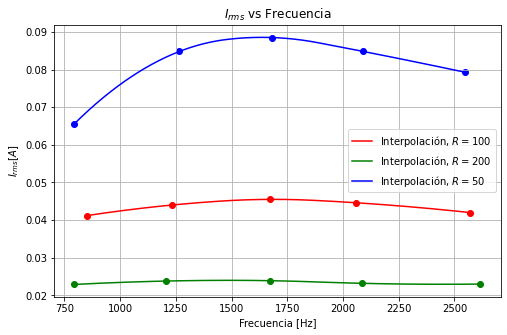

In [4]:
plt.figure(figsize=[8,5])
for i in range(3):
  sheet = str(R[i])+'R-'+str(C[0])+'C-'+str(L[0])+'L'
  data = pd.read_excel("Datos_Lab_RLC.xlsx", sheet)
  f_int1=interp1d(data['f'],data['Iexp'], kind='quadratic')
  max = minimize_scalar(lambda x: -f_int1(x),bounds=(np.min(data['f']),np.max(data['f'])), method='bounded')
  print(max)
  f2 = np.linspace(np.min(data['f']),np.max(data['f']),1000)
  plt.scatter(data['f'],data['Iexp'], c=colors[i])
  plt.plot(f2,f_int1(f2), c=colors[i], label='Interpolación, $R='+str(R[i])+'$')
plt.title('$I_{rms}$ vs Frecuencia')
plt.ylabel('$I_{rms}[A]$')
plt.xlabel('Frecuencia [Hz]')
plt.legend()
plt.grid()

     fun: -0.04550194796463455
 message: 'Solution found.'
    nfev: 10
  status: 0
 success: True
       x: 1689.513895284189
     fun: -0.04413804466468421
 message: 'Solution found.'
    nfev: 8
  status: 0
 success: True
       x: 2652.5796153323877
     fun: -0.04660061899150395
 message: 'Solution found.'
    nfev: 8
  status: 0
 success: True
       x: 1177.607753731227


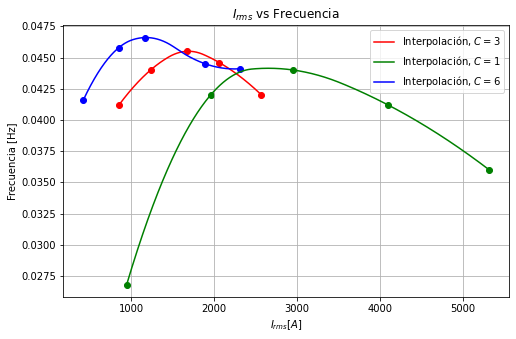

In [5]:
plt.figure(figsize=[8,5])
for i in range(3):
  sheet = str(R[0])+'R-'+str(C[i])+'C-'+str(L[0])+'L'
  data = pd.read_excel("Datos_Lab_RLC.xlsx", sheet)
  f_int1=interp1d(data['f'],data['Iexp'], kind='quadratic')
  max = minimize_scalar(lambda x: -f_int1(x),bounds=(np.min(data['f']),np.max(data['f'])), method='bounded')
  print(max)
  f2 = np.linspace(np.min(data['f']),np.max(data['f']),1000)
  plt.scatter(data['f'],data['Iexp'],c=colors[i])
  plt.plot(f2,f_int1(f2),c=colors[i],label='Interpolación, $C='+str(C[i])+'$')
plt.title('$I_{rms}$ vs Frecuencia')
plt.xlabel('$I_{rms}[A]$')
plt.ylabel('Frecuencia [Hz]')
plt.legend()
plt.grid()

     fun: -0.04550194796463455
 message: 'Solution found.'
    nfev: 10
  status: 0
 success: True
       x: 1689.513895284189
     fun: -0.046515752002730226
 message: 'Solution found.'
    nfev: 24
  status: 0
 success: True
       x: 2663.104162724679
     fun: -0.04453838055740021
 message: 'Solution found.'
    nfev: 8
  status: 0
 success: True
       x: 1257.539719276185


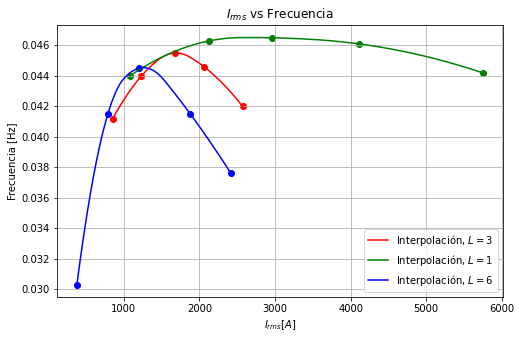

In [6]:
plt.figure(figsize=[8,5])
for i in range(3):
  sheet = str(R[0])+'R-'+str(C[0])+'C-'+str(L[i])+'L'
  data = pd.read_excel("Datos_Lab_RLC.xlsx", sheet)
  f_int1=interp1d(data['f'],data['Iexp'], kind='quadratic')
  max = minimize_scalar(lambda x: -f_int1(x),bounds=(np.min(data['f']),np.max(data['f'])), method='bounded')
  print(max)
  f2 = np.linspace(np.min(data['f']),np.max(data['f']),1000)
  plt.scatter(data['f'],data['Iexp'],c=colors[i])
  plt.plot(f2,f_int1(f2),c=colors[i],label='Interpolación, $L='+str(C[i])+'$')
plt.title('$I_{rms}$ vs Frecuencia')
plt.xlabel('$I_{rms}[A]$')
plt.ylabel('Frecuencia [Hz]')
plt.legend()
plt.grid()

In [7]:
f_res_teo_C=[1/(2*np.pi*np.sqrt(L[0]*1e-3*C[j]*1e-6)) for j in range(3)]
f_res_teo_C

[1677.640403482901, 2905.758415662736, 1186.2709056952951]

In [8]:
f_res_teo_L=[1/(2*np.pi*np.sqrt(L[j]*1e-3*C[0]*1e-6)) for j in range(3)]
f_res_teo_L

[1677.640403482901, 2905.758415662736, 1186.2709056952951]

In [9]:
w0=[1/(np.sqrt(L[0]*1e-3*C[j]*1e-6)) for j in range(3)]
w0

[10540.925533894597, 18257.418583505536, 7453.559924999298]